# Computational Illustration for Chapter 04: Support Vector Machines

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy.optimize import linprog
import cvxpy as cp

### The case of two linearly separable classes
blue dots labeled negatively, red crosses labeled positively

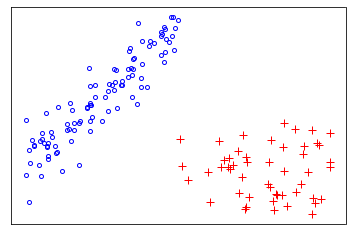

In [2]:
# generate the data
np.random.seed(1)
m0 = 100
m1 = 50
X0_x = np.random.uniform(0,1,m0)                   # abscissae of the blue dots
X0_y = 3/2*X0_x + np.random.normal(1/2,0.2,m0)     # their ordinates
X0 = np.column_stack((X0_x,X0_y))
X1_x = np.random.uniform(1,2,m1)                   # abscissae of the red crosses
X1_y = np.random.uniform(0,1,m1)                   # their ordinates
X1 = np.column_stack((X1_x,X1_y))
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+',mfc='none',markersize=8)
plt.xticks([])
plt.yticks([])
plt.show()

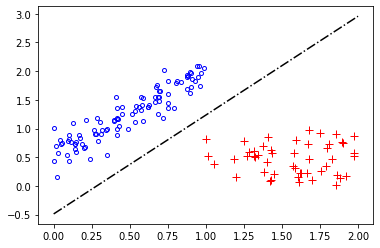

In [3]:
# create objective function
c = [0,0,0]

# create inequality constraints
X0_tilde = np.hstack((X0,-np.ones((m0,1))))
X1_tilde = np.hstack((-X1,np.ones((m1,1))))
A_ub = np.vstack( (X0_tilde,X1_tilde) )
b_ub = -np.ones(m0+m1)

# upper and lower bounds on variables
bounds = [(None,None)]*3

# solve linear programming
res = linprog(c, A_ub=A_ub, b_ub=b_ub, method='revised simplex', bounds=bounds)
w_f1 = res.x[0]
w_f2 = res.x[1]
b_f = res.x[2]

# visualize the "hyperplane" produced by a linear feasibility problem (in black)
grid_x = np.linspace(0,2,20)
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+',mfc='none',markersize=8)
plt.plot(grid_x,(-w_f1*grid_x+b_f)/w_f2,'k-.')
plt.show()

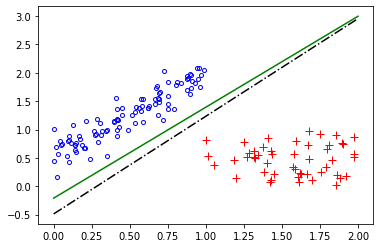

In [4]:
# separating "hyperplane" produced by the perceptron algorithm
X = np.row_stack((np.column_stack((X0,np.ones((m0,1)))),np.column_stack((X1,np.ones((m1,1))))) )
y = np.row_stack((-np.ones((m0,1)),np.ones((m1,1))))
w_p = np.zeros((3,1))
obj = y*np.matmul(X,w_p)
while min(obj)<=0:
    i = np.argmin(obj)
    w_p = w_p + (y[i]/LA.norm(X[i,:])**2)*np.transpose(X[i,:].reshape((1,3)))
    obj = y*np.matmul(X,w_p)
    
# visualize the "hyperplane" produced by the perceptron algorithm (in green)    
grid_x = np.linspace(0,2,20)
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+',mfc='none',markersize=8)
plt.plot(grid_x,(-w_f1*grid_x+b_f)/w_f2,'k-.')
plt.plot(grid_x,(-w_p[0]*grid_x-w_p[2])/w_p[1],'g')
plt.show() 

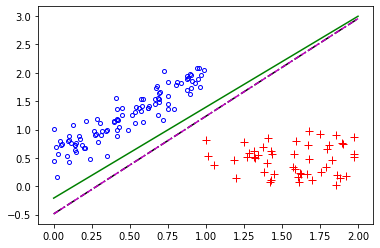

In [5]:
# separating "hyperplane" produced by hard SVM
# define data matrix
X = np.vstack((X0,-X1))
vec = np.ones(m0+m1)
vec[0:m0]=-1

# define variables
w = cp.Variable(2)
b = cp.Variable(1)

# claim the objective function
objective = cp.Minimize(cp.norm(w,2))

# define inequality constraints
constraints = [X@w + b*vec<=-1]
#constraints = [ X0[i,0]*w_hard[0] + X0[i,1]*w_hard[1] - b_hard <= -1 for i in range(m0)]
#constraints += [X1[i,0]*w_hard[0] + X1[i,1]*w_hard[1] - b_hard >= 1 for i in range(m1)]

# solve optimization problem
hard_SVM = cp.Problem(objective, constraints)
hard_SVM.solve()

w_h1 = w.value[0]
w_h2 = w.value[1]
b_h = b.value

# visualize the "hyperplane" produced by hard SVM (in magenta)
grid_x = np.linspace(0,2,20)
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+',mfc='none',markersize=8)
plt.plot(grid_x,(-w_f1*grid_x+b_f)/w_f2,'k-.')
plt.plot(grid_x,(-w_p[0]*grid_x-w_p[2])/w_p[1],'g')
plt.plot(grid_x,(-w_h1*grid_x+b_h)/w_h2,'m--')
plt.show()

## The case of two almost linearly separable classes 
blue dots labeled negatively, red crosses labeled positively

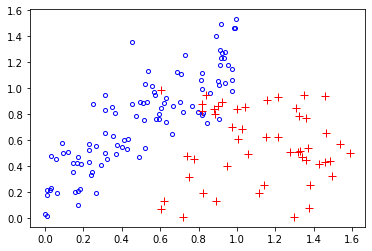

In [6]:
# generate the data 
m0 = 100
m1 = 50
X0_x = np.random.uniform(0,1,m0)                  # abscissae of the blue dots
X0_y = X0_x + 1/4 + np.random.normal(0,0.2,m0)    # their ordinates
X0 = np.column_stack((X0_x,X0_y))
X1_x = np.random.uniform(0.6,1.6,m1)              # abscissae of the red crosses
X1_y = np.random.uniform(0,1,m1)                  # their ordinates
X1 = np.column_stack((X1_x,X1_y))
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+',mfc='none',markersize=8)
plt.show()

Separating "hyperplane" produced by soft SVM

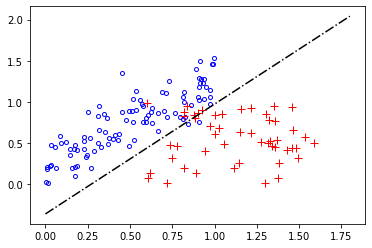

In [7]:
# Define data matrix
X = np.vstack((X0,-X1))
vec = np.ones(m0+m1)
vec[0:m0]=-1

lamb = 1e-3
w = cp.Variable(2)
b = cp.Variable(1)
e = cp.Variable(m0+m1,pos=True)

objective = cp.Minimize(cp.norm(w,2)+cp.sum(e)/lamb)

constraints = [X@w+b*vec<=-1+e]
#constraints = [ X0[i,0]*w[0] + X0[i,1]*w[1] - b <= -1+e0[i] for i in range(m0)]
#constraints += [X1[i,0]*w[0] + X1[i,1]*w[1] - b >= 1-e1[i] for i in range(m1)]

soft_svm = cp.Problem(objective, constraints)
soft_svm.solve()

w_s1 = w.value[0]
w_s2 = w.value[1]
b_s = b.value

# visualize the "hyperplane" (in black)
grid_x = np.linspace(0,1.8,20)
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+',mfc='none',markersize=8)
plt.plot(grid_x,(b_s-w_s1*grid_x)/w_s2,'k-.')
plt.show()

## First case of two classes clearly not linearly separable
blue dots labeled negatively, red crosses labeled positively

In [8]:
def kernel_svm(K,mu,m0,m1):
    M = np.zeros(shape=K.shape)
    M[0:m0,:] = K[0:m0,:]
    M[m0:m0+m1,:] = -K[m0:m0+m1,:]
    vector = np.vstack( (np.ones((m0,1)),-np.ones((m1,1))) )

    a = cp.Variable((m0+m1,1))
    b = cp.Variable(1)
    e = cp.Variable((m0+m1,1),pos=True)

    objective = cp.Minimize(cp.quad_form(a,K)+cp.sum(e)/mu)
    constraints = [ M@a-b*vector<=-1+e]
    prob = cp.Problem(objective, constraints)
    prob.solve(solver='ECOS')
    
    coef = a.value
    intercept = b.value
    return coef,intercept

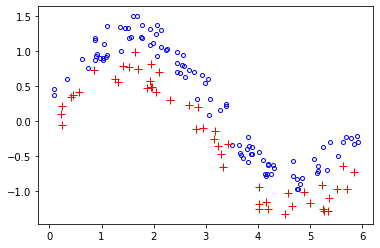

In [9]:
# generate the data
m0 = 100;
m1 = 50;
x0_x = np.random.uniform(0,6,(m0,1))                   # abscissae of thr blue dots
x0_y = np.sin(x0_x)+np.random.uniform(0,0.5,(m0,1))    # their ordinates
X0 = np.column_stack( (x0_x, x0_y) )
x1_x = np.random.uniform(0,6,(m1,1))                   # abscissae of the red crosses
x1_y = np.sin(x1_x)-np.random.uniform(0,0.5,(m1,1))    # their ordinates
X1 = np.column_stack( (x1_x, x1_y) )
X = np.row_stack((X0,X1))
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+',mfc='none',markersize=8)
plt.show()

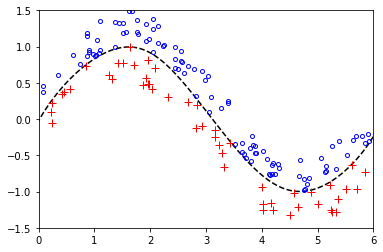

In [10]:
# Soft SVM with a polynomial kernel
m = m0+m1
K = np.zeros((m,m))
for i in range(m):
    for j in range(m):
        K[i,j] = (1+X[i,:]@X[j,:].T)**3
mu = 1e-3
a_poly,b_poly = kernel_svm(K,mu,m0,m1)

grid_x = np.linspace(0,6,500)
grid_y = np.linspace(-1.5,1.5,500)

p,q = np.meshgrid(grid_x,grid_y)
f = sum( (1+X[i,0]*p+X[i,1]*q)**3*a_poly[i] for i in range(m0+m1)   )
plt.contour(grid_x,grid_y,f-b_poly,0,colors='k',linestyles='dashed')
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+',mfc='none',markersize=8)
plt.show()

## Second case of two classes clearly not linearly separable
blue dots labeled negatively, red crosses labeled positively

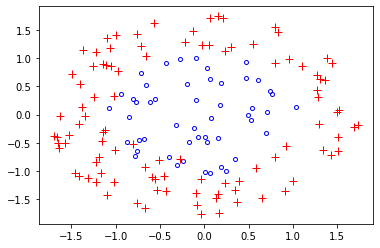

In [11]:
# generate the data
m0 = 50
m1 = 100
r0 = 1.1*np.sqrt(np.random.uniform(0,1,(m0,1)))
theta0 = np.random.uniform(0,2*np.pi,(m0,1))
r1 = 0.8+np.sqrt(np.random.uniform(0,1,(m1,1)))
theta1 = np.random.uniform(0,2*np.pi,(m1,1))
X0 = np.column_stack((r0*np.cos(theta0), r0*np.sin(theta0)))
X1 = np.column_stack((r1*np.cos(theta1), r1*np.sin(theta1)))
X = np.row_stack((X0,X1))
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+',mfc='none',markersize=8)
plt.show()

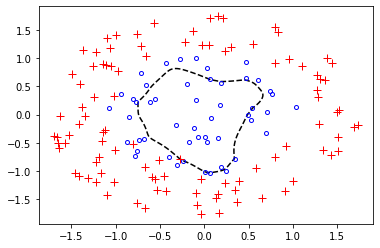

In [12]:
# Soft SVM with a gaussian kernel
sigma = 1
m = m0+m1
K = np.zeros((m,m))
for i in range(m):
    for j in range(m):
        K[i,j] = np.exp(-LA.norm(X[i,:]-X[j,:],ord=2)**2/(2*sigma**2))
mu = 0.2
a_gaus,b_gaus = kernel_svm(K,mu,m0,m1)

grid_x = np.linspace(-1.5,1.5,500)
grid_y = np.linspace(-1.5,1.5,500)

p,q = np.meshgrid(grid_x,grid_y)
f = sum( (np.exp( -np.sqrt((X[i,0]-p)**2+(X[i,1]-q)**2) / (2*sigma**2) )  *a_gaus[i] for i in range(m0+m1)   ))
plt.contour(grid_x,grid_y,f-b_gaus,0,colors='k',linestyles='dashed')
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+',mfc='none',markersize=8)
plt.show()